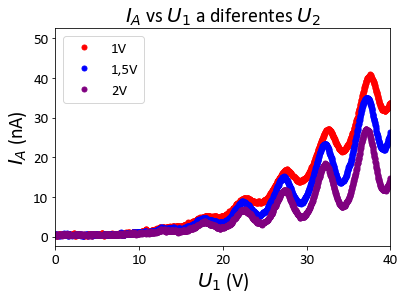

In [78]:
import csv
import matplotlib.pyplot as plt

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Calibri')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=',')
        
        # Saltar las dos primeras líneas que contienen encabezados
        next(lector_csv)
        next(lector_csv)

        for fila in lector_csv:
            # Verificar si ambas columnas contienen números
            if fila[0].replace(',', '').replace('.', '').isdigit() and fila[1].replace(',', '').replace('.', '').isdigit():
                x_value = float(fila[0].replace(',', '.'))  # Reemplazar ',' con '.' y convertir a float
                y_value = float(fila[1].replace(',', '.'))  # Reemplazar ',' con '.' y convertir a float
                columna1.append(x_value)
                columna2.append(y_value)
                

    return columna1, columna2

# Función para crear un gráfico de dispersión con barras de error
def crear_grafico(columna1, columna2, etiqueta, color):
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5, color=color, linewidth=0)

# Lista de nombres de archivos CSV
archivos_csv = ['1V.csv', '1,5V.csv', '2V.csv']
colores = ['red', 'blue', 'purple']

# Leer los archivos CSV y crear gráficos para cada uno
for i, archivo in enumerate(archivos_csv):
    columna1, columna2 = leer_csv(archivo)
    etiqueta = archivo.split('.')[0]  # Usar el nombre del archivo sin extensión como etiqueta
    crear_grafico(columna1, columna2, etiqueta, colores[i])

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=20)
plt.ylabel(r'$I_A$ (nA)', fontsize=20)
plt.xlim(0,40)
plt.title(r'$I_A$ vs $U_1$ a diferentes $U_2$', fontsize=20)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15)
plt.show()


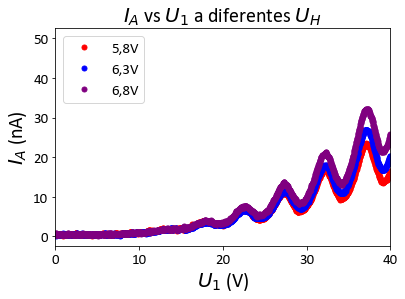

In [80]:
import csv
import matplotlib.pyplot as plt

# Configurar la fuente para los ejes en Times New Roman
plt.rc('font', family='Calibri')

# Función para leer un archivo CSV y convertir las columnas en listas
def leer_csv(nombre_archivo):
    columna1 = []
    columna2 = []
    with open(nombre_archivo, 'r') as archivo:
        lector_csv = csv.reader(archivo, delimiter=',')
        
        # Saltar las dos primeras líneas que contienen encabezados
        next(lector_csv)
        next(lector_csv)

        for fila in lector_csv:
            # Verificar si ambas columnas contienen números
            if fila[0].replace(',', '').replace('.', '').isdigit() and fila[1].replace(',', '').replace('.', '').isdigit():
                x_value = float(fila[0].replace(',', '.'))  # Reemplazar ',' con '.' y convertir a float
                y_value = float(fila[1].replace(',', '.'))  # Reemplazar ',' con '.' y convertir a float
                columna1.append(x_value)
                columna2.append(y_value)
                

    return columna1, columna2

# Función para crear un gráfico de dispersión con barras de error
def crear_grafico(columna1, columna2, etiqueta, color):
    plt.errorbar(columna1, columna2, xerr=0.01, yerr=0.01, fmt='o', label=etiqueta, markersize=5, color=color, linewidth=0)

# Lista de nombres de archivos CSV
archivos_csv = ['5,8V.csv', '6,3V.csv', '6,8V.csv']
colores = ['red', 'blue', 'purple']

# Leer los archivos CSV y crear gráficos para cada uno
for i, archivo in enumerate(archivos_csv):
    columna1, columna2 = leer_csv(archivo)
    etiqueta = archivo.split('.')[0]  # Usar el nombre del archivo sin extensión como etiqueta
    crear_grafico(columna1, columna2, etiqueta, colores[i])

# Configuración del gráfico
plt.xlabel(r'$U_1$ (V)', fontsize=20)
plt.ylabel(r'$I_A$ (nA)', fontsize=20)
plt.xlim(0,40)
plt.title(r'$I_A$ vs $U_1$ a diferentes $U_H$', fontsize=20)
plt.rc('xtick', labelsize=15)  # Tamaño de los números en el eje x
plt.rc('ytick', labelsize=15)  # Tamaño de los números en el eje y
plt.legend(fontsize=15, loc='upper left')
plt.show()

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def regresion_lineal(X, Y):
    m, b = np.polyfit(X, Y, 1)
    error_pendiente = np.std(Y - (m * X + b))
    Y_pred = m * X + b
    ss_tot = np.sum((Y - np.mean(Y))**2)
    ss_res = np.sum((Y - Y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Arreglo de valores ajustados usando la regresión
    Y_pred = m * X + b
    
    # Crear una figura con dos subgráficos
    fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
    
    # Gráfica de la regresión lineal en el primer subgráfico
    axs[0].scatter(X, Y, label='Datos reales')
    axs[0].plot(X, Y_pred, color='red', label=f'Regresión Lineal: y = {m:.2f}x + {b:.2f}\nR² = {r2:.2f}')
    axs[0].set_ylabel('Orden del mínimo', fontsize=20)
    axs[0].set_title(r' $\frac{\mathrm{d \Delta E} }{\mathrm{d} n}$', fontsize=20)
    axs[0].legend(fontsize=15)
    
    # Gráfica de los residuales en el segundo subgráfico
    residuals = Y - Y_pred
    axs[1].scatter(X, residuals, color='green', label='Residuales')
    axs[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)  
    axs[1].set_ylabel('Residuales', fontsize=20)
    axs[1].legend(fontsize=15)
    
    # Ajustar el diseño para evitar superposiciones
    plt.tight_layout()
    
    # Guardar la figura que contiene ambos subgráficos
    plt.savefig('regresion_y_residuales.png')
    
    # Mostrar la figura en la pantalla (opcional)
    plt.show()
    
    return m, error_pendiente, r2, b


# Función para calcular E_alpha
def calcular_E_alpha(l, L, E):
    return E(0.5)/(1 + (2 * 0.5 + 1) * l / L)


def error_E_alpha(E, l, L, delta_l):
    term1 = (2 * 0.5 + 1) / (1 + (2 * 0.5 + 1) * (l / L))**2
    delta_E_alpha = abs(term1) * delta_l * E(0.5)
    return delta_E_alpha

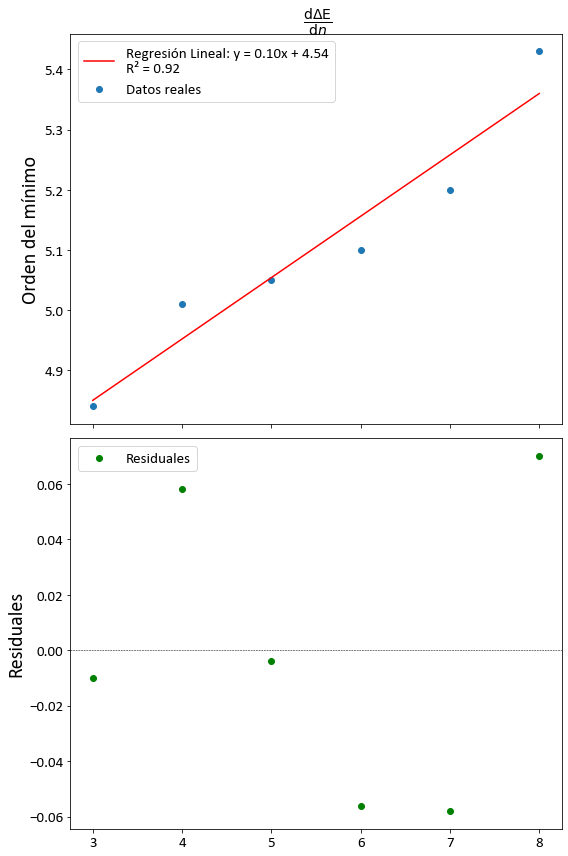

Pendiente de la regresión: 0.10199999999999984
Error de la pendiente: 0.049799598391954754
Coeficiente de determinación (R²): 0.9244478293983249
l = 0.13
Error de l: 0.06
E_alpha = 3.91
Error de E_alpha = 0.49


In [112]:

X = np.array([3, 4, 5, 6, 7, 8])
Y = np.array([4.84,5.01, 5.05, 5.1, 5.20, 5.43 ])

pendiente, error, r2, b = regresion_lineal(X, Y)

a = 12/(2*4.67)

l = a * pendiente
error_l = abs(a) * error


print(f'Pendiente de la regresión: {pendiente}')
print(f'Error de la pendiente: {error}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'l = {l:.2f}')
print(f'Error de l: {error_l:.2f}')

L = 12

E = lambda x: int(pendiente)*x + int(b)


# Calcular E_alpha y su error
E_alpha= calcular_E_alpha(l, L, E)
error_E_alpha_a = error_E_alpha(E, l, L, error_l)

print(f'E_alpha = {E_alpha:.2f}')
print(f'Error de E_alpha = {error_E_alpha_a:.2f}')

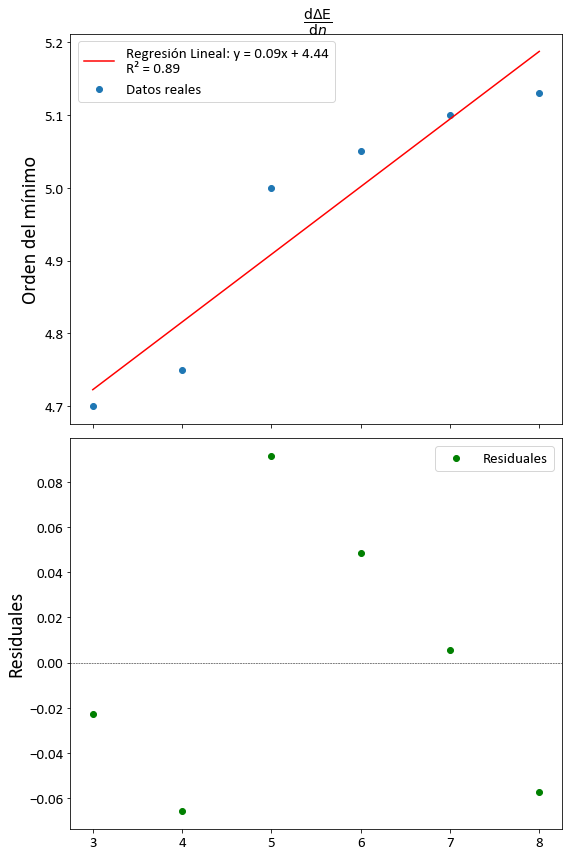

Pendiente de la regresión: 0.0928571428571427
Error de la pendiente: 0.05606119105813894
Coeficiente de determinación (R²): 0.8889122659373021
l = 0.12
Error de l: 0.07
E_alpha = 3.92
Error de E_alpha = 0.55


In [113]:
X = np.array([3, 4, 5, 6, 7, 8])
Y = np.array([4.70,4.75, 5.0, 5.05, 5.1, 5.13 ])

pendiente, error, r2, b = regresion_lineal(X, Y)

a = 12/(2*4.67)

l = a * pendiente
error_l = abs(a) * error


print(f'Pendiente de la regresión: {pendiente}')
print(f'Error de la pendiente: {error}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'l = {l:.2f}')
print(f'Error de l: {error_l:.2f}')

L = 12

E = lambda x: int(pendiente)*x + int(b)


# Calcular E_alpha y su error
E_alpha= calcular_E_alpha(l, L, E)
error_E_alpha_a = error_E_alpha(E, l, L, error_l)

print(f'E_alpha = {E_alpha:.2f}')
print(f'Error de E_alpha = {error_E_alpha_a:.2f}')

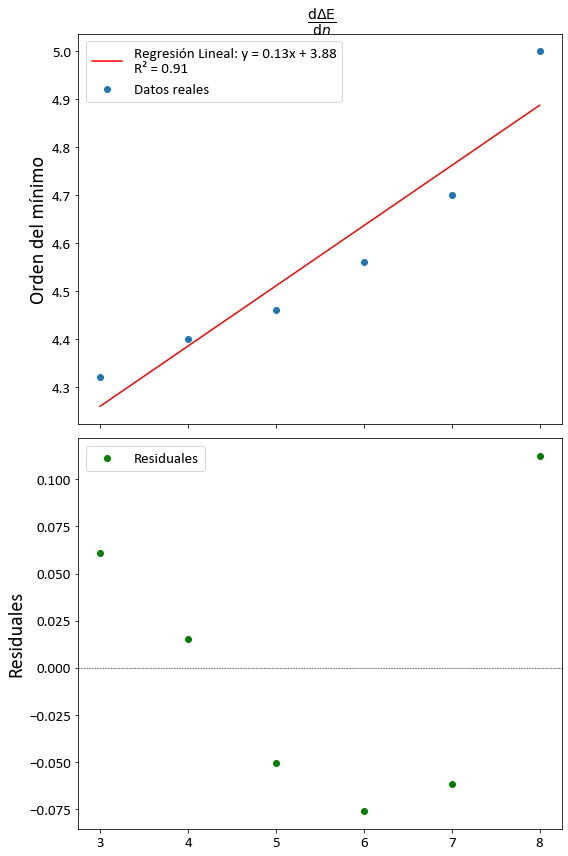

Pendiente de la regresión: 0.12571428571428556
Error de la pendiente: 0.06923619569019378
Coeficiente de determinación (R²): 0.9058016219588269
l = 0.16
Error de l: 0.09
E_alpha = 2.92
Error de E_alpha = 0.51


In [115]:
X = np.array([3, 4, 5, 6, 7, 8])
Y = np.array([4.32,4.40,4.46, 4.56, 4.70, 5.0 ])

pendiente, error, r2, b = regresion_lineal(X, Y)

a = 12/(2*4.67)

l = a * pendiente
error_l = abs(a) * error


print(f'Pendiente de la regresión: {pendiente}')
print(f'Error de la pendiente: {error}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'l = {l:.2f}')
print(f'Error de l: {error_l:.2f}')

L = 12

E = lambda x: int(pendiente)*x + int(b)


# Calcular E_alpha y su error
E_alpha= calcular_E_alpha(l, L, E)
error_E_alpha_a = error_E_alpha(E, l, L, error_l)

print(f'E_alpha = {E_alpha:.2f}')
print(f'Error de E_alpha = {error_E_alpha_a:.2f}')